# 이진 분류 예측
- 머신러닝에서 이진 분류 모델로 사용되는 Logistic Regression 알고리즘은 회귀를 사용하여 데이터가 어던 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 그 확률에 다라 가능성이 더 높은 범주에 속하는 것으로 분류하는 것이다. 예를 들어 직장인의 연봉과 나에 다라 구입의사 확률이 달라진다고 보고, 선형회귀를 사용해 임계값을 넘으면 구입하고 못넘으면 구입하지 않는 식으로, 즉 데이터를 1과 0의 두가지 그룹으로 나누기 위해 사용하는 분류 모델이다. 단순 분류보다는 기계학습으로 분류 문제 해결하기 위해 2개의 범주로 데이터를 나누는 결정 경계(decision boundary)를 찾는 것이다. 
- 결정 경계는 학습데이터를 2개의 범주 영역으로 나누는 직선이나 표면으로 테스트 데이터가 결정경계의 어느 범주에 속하는지 확인하는 것이다. 신문기사가 악의적인지 우호적인지, 메일이 스팸인지 분류 필터링하거나 사용자가 제품을 구압할지 여부를 가부 분류 에측하는 데 사용할 수 있다. 
- 어떤 제품을 살 의사가 있으면 1, 없으면 0의 가부 여부를 이진 분류하려면 연령과 예상 급여 간의 관계를 찾아야 한다. 관계로부터 찾는 결과는 구입할지 아닐지 0,1로 구분하는 확률 값이다. 로지스틱 알고리즘의 결과값은 분류 확률이고 그 값이 임계값(0.5)이상이냐 아니냐 여부에 다라 두가지 그룹으로 나누기 위해 사용하는 모델이다. 구입의사는 확률이 0과 1사이의 값만으로 구분되므로, 분류확률을 0에서 1사이로 커브 모양으로 나타내야 하기 대문에 데이터 값을 시그모이드 함수에 넣어서 0,1 범위의 확률을 구한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.DataFrame({'age' : [19,35,46,57,89,57,97,132,35,65,86,56,90,32,78,79,47,45,36,33,45],
                  'salary' : [19000, 20000, 43000,57000,76000,58000,150000,33000,65000,80000,
                              52000,86000, 30000, 40000, 62000, 67000, 92000, 49000, 12000, 42000,
                              27000
                             ],
                  'purchased':[0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0]
                  })

In [3]:
x = df[['age', 'salary']].values
y = df['purchased'].values

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size=0.24, random_state=0)

- 모델이 데이터 공간의 데이터 포인트에서 가장 가까운 이웃을 찾을 때 쉽게 찾도록 데이터 값이 서로 비슷한 범위에 있도록 스케일링으로 정규화해야 한다. 이를 통해 각 기능은 의사결정에 똑같이 기여하게 된다. sklearn이 제공하는 standarscalar를 확용해서 평균0, 표준편차 1로 변환하여 데이터를 정규화(스케일링)한다. 
- fit_transform은 학습세트는각 속성(feature)마다 fit을 하여 일단 컬럼을 만들고, 이후 transform을 통해 데이터를 변형시킨다. 테스트 세트는 별도로 fit을 할 필요 없이 바로 transform한다. 

- 정규화(Normalization)는 데이터들 간의 동일한 정도의 스케일(중요도)로 반영되도록 데이터 변환하는 방법으로, 표준화(standardization)라고도 하낟. 이터를 변환하여 정규화/표준화하는 방법은 Min-Max scaling Normalizaion(최소-최대 스케일 정규화)와 Z-score Batch Normalization(Z-점수 표준화) 방법을 많이 사용한다.
- Z-점수 표준화 방법은 X-평균/표준편차 수식으로 계산하며, 평균 0과 표준편차 1인 정규 분포로 변환하여 표준정규분포로 근사해 간다. 즉 이상치를 잘 처리하고 표준편차가 큰 것(값이 넓게 퍼저 있는)을 변환한다
- 최소-최대 스케일 정규화 방법은 x-min(x)/(max(x)-min(x))의 수식으로 계산하며, 0-1 범위에 최대값과 최소값이 들도록 스케일을 조정하는 방법이다. scale이 다른 두 변수를 0~1 범위의 값으로 변환하게 되며 상호간에 비교가 가능해진다 

In [5]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [6]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [7]:
classifier.predict(xtest)

array([0, 0, 0, 0, 1, 1], dtype=int64)

In [8]:
# 각 feature들의 계수를 확인하기 위해 coef(가중치)와 intercept(편향)으로 부터 값을 얻는다 
a, b, c = classifier.coef_[0,0], classifier.coef_[0,1], classifier.intercept_

In [9]:
# 값으로 얻어낸 식은 다중 선형회귀(multiple regression) 이지만, 
# 그래프 분류선으므로 x축이 x1이고 y 축이 x2이므로 여기에 맞추어 식을 x2로 결정 계경선을 그은다 
x1 = np.linspace(-2, 2, 100)
x2 = (-a/b) * x1 - (c/b)

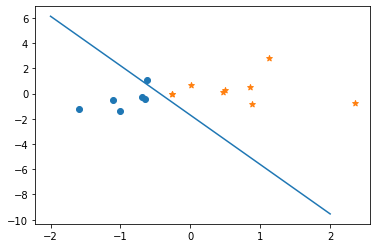

In [10]:
plt.plot(x1, x2)
plt.scatter(xtrain[:, 0][ytrain==0], xtrain[:, 1][ytrain==0], marker='o')
plt.scatter(xtrain[:, 0][ytrain==1], xtrain[:, 1][ytrain==1], marker='*')